<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/emotion_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanshvisariya","key":"f4411a34fd7d0cca77d6612fa12f825e"}'}

In [2]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Nov  3 15:50 kaggle.json


In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!pwd

/content


In [7]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          17309        376  1.0              
bhadramohit/smartphone-usage-and-behavioral-dataset          Smartphone Usage and Behavioral Dataset         17KB  2024-10-23 03:16:02           1597         34  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           9500        153  1.0              
prathamjyotsingh/netflix-vs-disney                           Netflix vs. Disney                     

In [8]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 91% 55.0M/60.3M [00:00<00:00, 286MB/s]
100% 60.3M/60.3M [00:00<00:00, 284MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile("fer2013.zip")
zip_ref.extractall()
zip_ref.close()

In [10]:
import os

for dirpath, dirnames, filenames in os.walk("train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'train'.
There are 0 directories and 3171 images in 'train/surprise'.
There are 0 directories and 4097 images in 'train/fear'.
There are 0 directories and 436 images in 'train/disgust'.
There are 0 directories and 7215 images in 'train/happy'.
There are 0 directories and 4965 images in 'train/neutral'.
There are 0 directories and 3995 images in 'train/angry'.
There are 0 directories and 4830 images in 'train/sad'.


In [11]:
for dirpath, dirnames, filenames in os.walk("test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 7 directories and 0 images in 'test'.
There are 0 directories and 831 images in 'test/surprise'.
There are 0 directories and 1024 images in 'test/fear'.
There are 0 directories and 111 images in 'test/disgust'.
There are 0 directories and 1774 images in 'test/happy'.
There are 0 directories and 1233 images in 'test/neutral'.
There are 0 directories and 958 images in 'test/angry'.
There are 0 directories and 1247 images in 'test/sad'.


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (48, 48)


array([[133,  77,  31, ...,  53,  81, 112],
       [146,  83,  43, ...,  30,  78,  98],
       [132,  81,  47, ...,   0,  57, 102],
       ...,
       [ 56,  38,  38, ...,   0,   3,  15],
       [ 55,  37,  44, ...,   0,   2,  17],
       [ 56,  42,  47, ...,   3,   0,  18]], dtype=uint8)
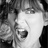

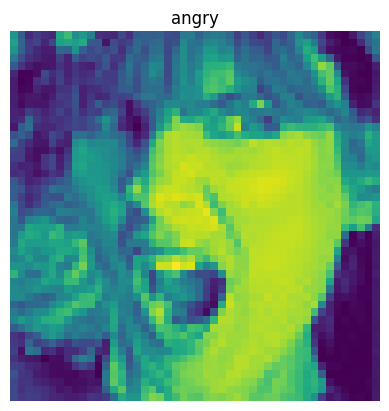

In [15]:
random_image(target_dir="train/", target_class="angry")

Image shape: (48, 48)


array([[175, 171, 174, ..., 167, 169, 171],
       [179, 174, 176, ..., 162, 163, 169],
       [175, 176, 179, ..., 157, 159, 166],
       ...,
       [210, 209, 114, ..., 176, 183, 189],
       [230, 200, 193, ..., 180, 181, 193],
       [233, 219, 188, ..., 191, 193, 195]], dtype=uint8)
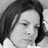

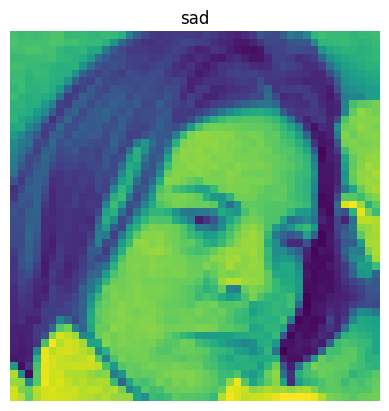

In [16]:
random_image(target_dir="train/", target_class="angry")

In [17]:
class_name = ['angry','disgust','fear','happy','neutral','sad','surprise']

Image shape: (48, 48)


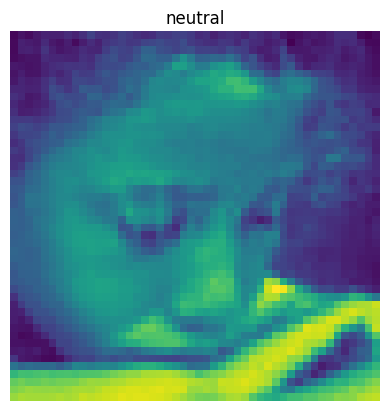

In [19]:
img=random_image(target_dir="train/", target_class="neutral")

**note:-** the size of all the images is same , which is 48*48
also the images are in black and white

In [21]:
img.shape

(48, 48)

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)


In [25]:
train_data_augmented = train_data.flow_from_directory('train/',
                                                      target_size=(48, 48),
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      shuffle=True)

test_data_augmented = test_data.flow_from_directory('test/',
                                                    target_size=(48, 48),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [36]:
import numpy as np
train_data_augmented = np.array(train_data_augmented)
test_data_augmented = np.array(test_data_augmented)

KeyboardInterrupt: 

In [37]:
train_data_augmented = np.expand_dims(train_data_augmented, axis=-1)
test_data_augmented = np.expand_dims(test_data_augmented, axis=-1)

KeyboardInterrupt: 

In [35]:
print(type(train_data_augmented))

<class 'keras.src.preprocessing.image.DirectoryIterator'>


In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [28]:
model_complex = Sequential([
  Conv2D(128, 3, activation='relu', input_shape=(48, 48)),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(7, activation='softmax')
])

model_complex.summary()

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 48, 48)

In [ ]:

# Compile the model
model_complex.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history_2 = model_complex.fit(train_data_augmented, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data_augmented,
                        validation_steps=len(test_data_augmented))